In [1]:
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Imports for arithmetic calculations and data frame manipulationimport pandas as pd 
import numpy as np
import pandas as pd

#Imports for statistical analysis
from scipy import stats
import statistics

#Imports for creating visualizations
import matplotlib.pyplot as plt 
import seaborn as sns

#imports for splitting data and imputing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

#Imports for preprocessing
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

#Imports for modeling and evaluation
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE

#Imports for user defined functions
import wrangle as wr
import explore as ex

# plotting defaults
plt.rc('figure', figsize=(13, 6))
plt.style.use('seaborn-whitegrid')
plt.rc('axes.spines', top=False, right=False)
plt.rc('font', size=14)

## Acquire + Prepare Data

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
# Rename columns for clarity and consistency
# lowercase
df.columns = df.columns.str.lower()

#replace white spaces with underscores
df.columns = df.columns.str.replace(' ', '_')

df.head()

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,...,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy_', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles_', '_bmi_', 'under-five_deaths_', 'polio', 'total_expenditure',
       'diphtheria_', '_hiv/aids', 'gdp', 'population',
       '_thinness__1-19_years', '_thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

In [7]:
# renaming columns
df.rename(columns = {'life_expectancy_':'life_expectancy',
                     'measles_':'measles',
                     '_bmi_':'bmi', 
                     'under-five_deaths_':'under_five_deaths',
                     'diphtheria_':'diphtheria', 
                     '_hiv/aids': 'hiv_aids', 
                     '_thinness__1-19_years':'thinness_1to19_years',
                     '_thinness_5-9_years':'thinness_5to9_years'}, inplace=True)

df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv_aids', 'gdp', 'population', 'thinness_1to19_years',
       'thinness_5to9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [8]:
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1to19_years,thinness_5to9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Deal with Null Values

In [9]:
wr.attribute_nulls(df)

,rows_missing,percent_missing
country,0,0.000000
year,0,0.000000
status,0,0.000000
life_expectancy,10,0.003404
adult_mortality,10,0.003404
infant_deaths,0,0.000000
alcohol,194,0.066031
percentage_expenditure,0,0.000000
hepatitis_b,553,0.188223
measles,0,0.000000


In [10]:
wr.column_nulls(df)

,cols_missing,rows,percent_missing
0,0,1649,0.000000
1,1,657,0.045455
2,2,360,0.090909
3,3,64,0.136364
4,4,122,0.181818
5,5,45,0.227273
6,6,28,0.272727
7,8,4,0.363636
8,9,9,0.409091


*Apart from hepatitis B and population I don't seem to be missing too many values in any columns. Since most missing values are continuous I'll simply impute with the mean for my first iteration.*

In [11]:
# Impute mean using Simple Imputer

columns_to_impute = ['life_expectancy','adult_mortality', 
                          'alcohol', 'hepatitis_b', 
                          'bmi', 'polio', 'total_expenditure',
                          'diphtheria', 'gdp', 'population',
                         'thinness_1to19_years', 'thinness_5to9_years', 
                          'income_composition_of_resources', 'schooling']

imputer = SimpleImputer(strategy='mean', missing_values=np.nan)

imputer = imputer.fit(df[columns_to_impute])
df[columns_to_impute] = imputer.transform(df[columns_to_impute])
df

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1to19_years,thinness_5to9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [12]:
# Sanity check
df.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under_five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv_aids                           0
gdp                                0
population                         0
thinness_1to19_years               0
thinness_5to9_years                0
income_composition_of_resources    0
schooling                          0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2938 non-null   float64
 4   adult_mortality                  2938 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2938 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2938 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2938 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  polio               

*Country and status are our only non-continuous categorical variables.*

In [14]:
#Let's make a list of all the countries in country column
countries = df.country.unique()
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [15]:
df.status.value_counts()

Developing    2426
Developed      512
Name: status, dtype: int64

In [16]:
# I'll one hot encode that status variable since it has only two values
dummy_df = pd.get_dummies(df[['status']], dummy_na = False, drop_first = True)
df = pd.concat([df, dummy_df], axis = 1)
df.rename(columns={'status_Developing':'developing'}, inplace=True)
df = df.drop(columns=['status'])
df.head()

,country,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1to19_years,thinness_5to9_years,income_composition_of_resources,schooling,developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   life_expectancy                  2938 non-null   float64
 3   adult_mortality                  2938 non-null   float64
 4   infant_deaths                    2938 non-null   int64  
 5   alcohol                          2938 non-null   float64
 6   percentage_expenditure           2938 non-null   float64
 7   hepatitis_b                      2938 non-null   float64
 8   measles                          2938 non-null   int64  
 9   bmi                              2938 non-null   float64
 10  under_five_deaths                2938 non-null   int64  
 11  polio                            2938 non-null   float64
 12  total_expenditure   

In [18]:
# Change the year to object data type since it is categorical
df.year = df.year.astype(object)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   object 
 2   life_expectancy                  2938 non-null   float64
 3   adult_mortality                  2938 non-null   float64
 4   infant_deaths                    2938 non-null   int64  
 5   alcohol                          2938 non-null   float64
 6   percentage_expenditure           2938 non-null   float64
 7   hepatitis_b                      2938 non-null   float64
 8   measles                          2938 non-null   int64  
 9   bmi                              2938 non-null   float64
 10  under_five_deaths                2938 non-null   int64  
 11  polio                            2938 non-null   float64
 12  total_expenditure   

*The data is looking pretty clean so far. I'll move on to some univariate exploration/distribution plotting before splitting.*

### Univariate Exploration

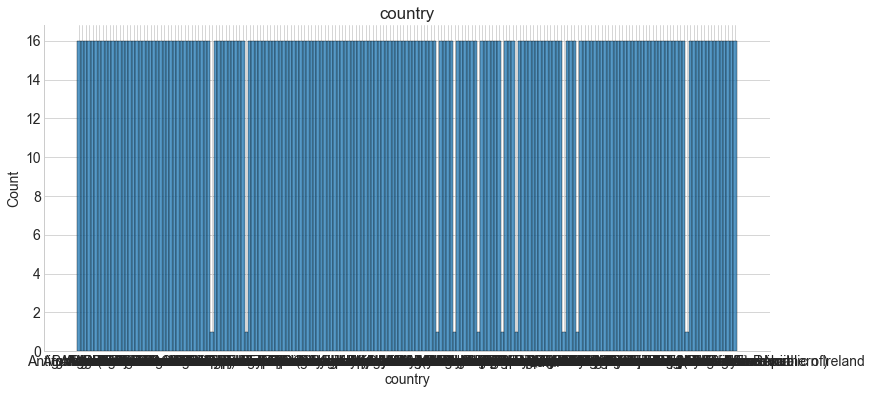

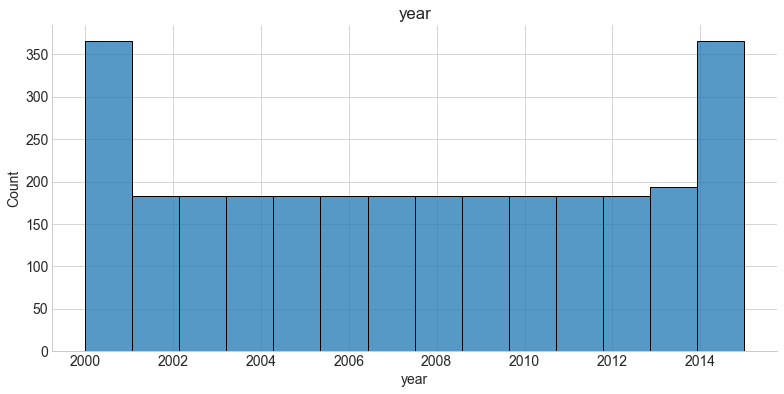

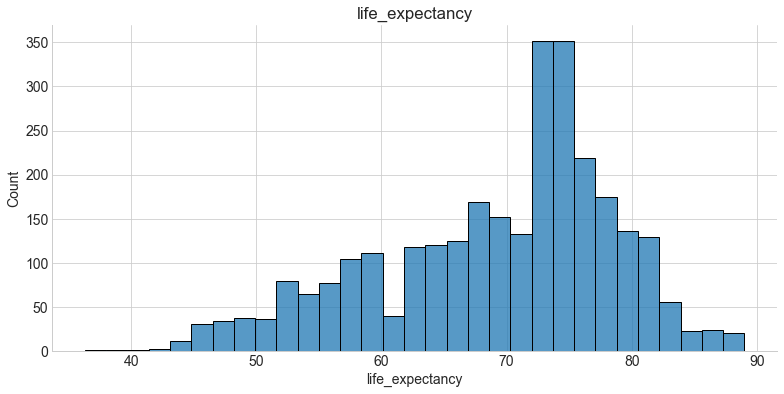

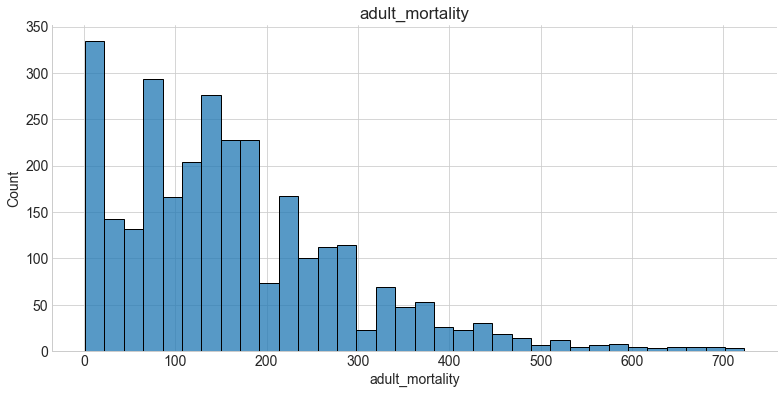

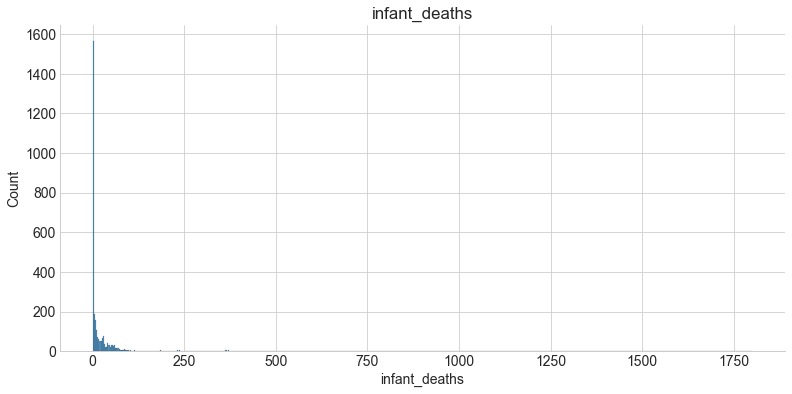

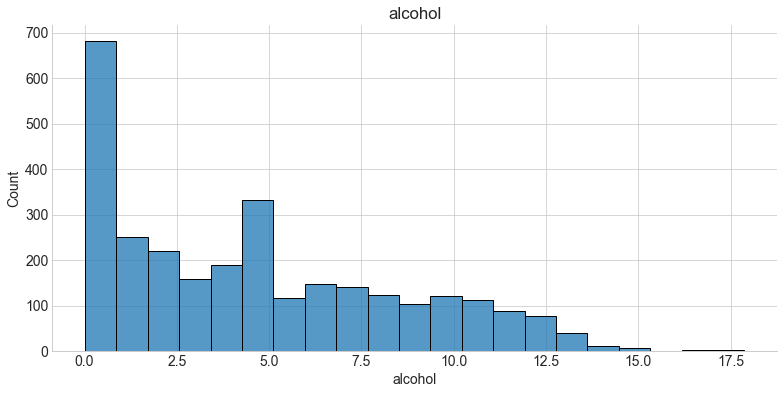

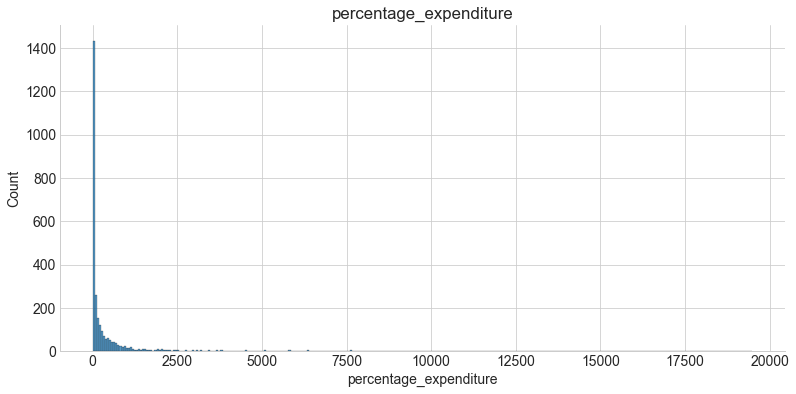

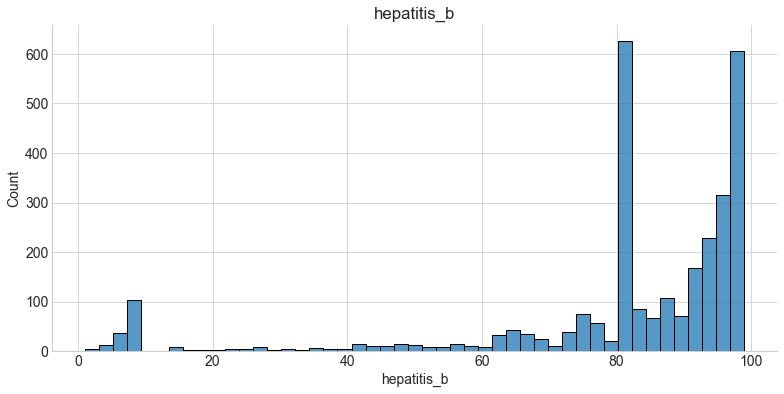

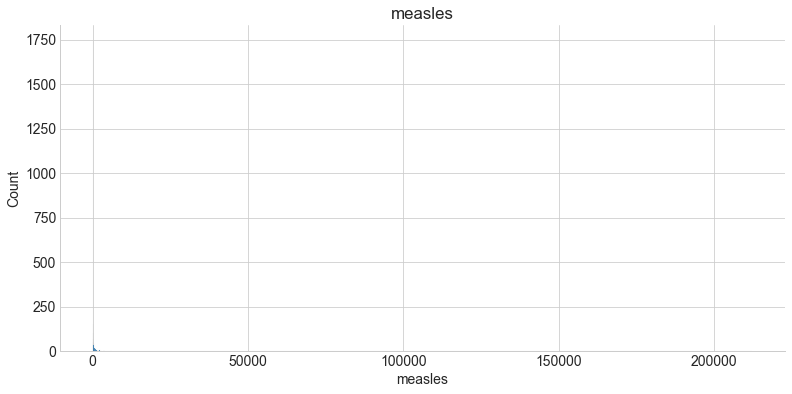

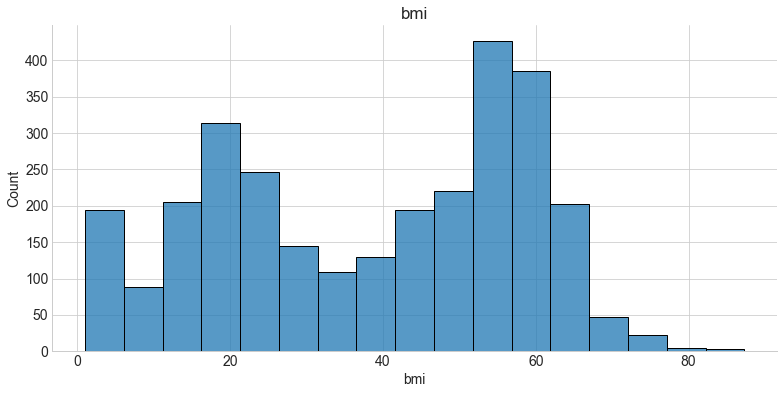

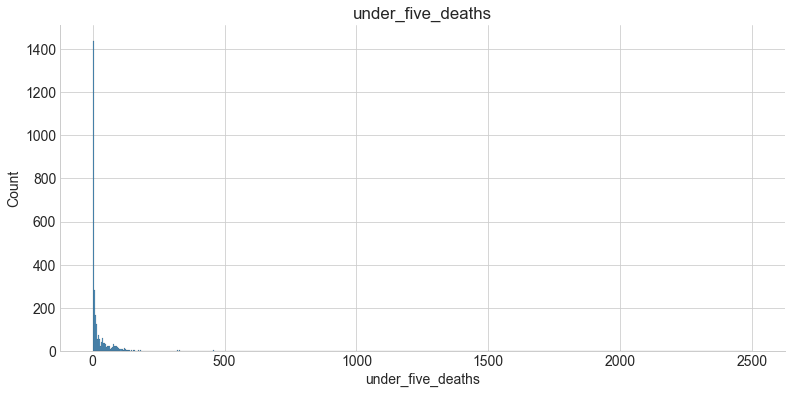

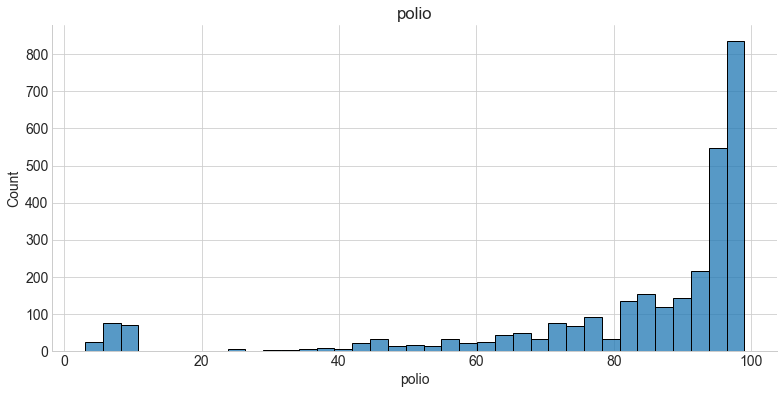

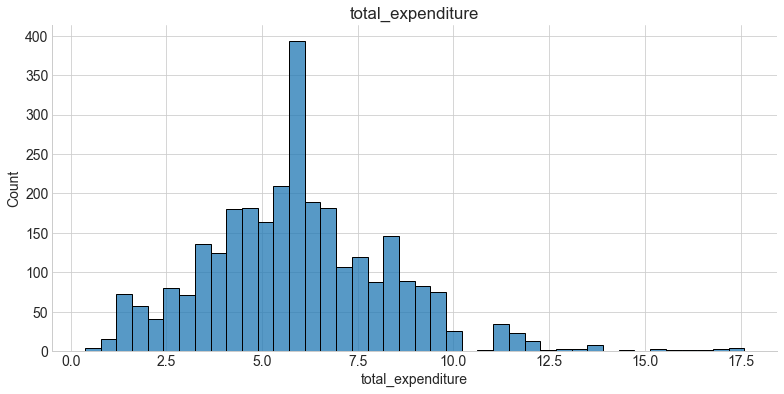

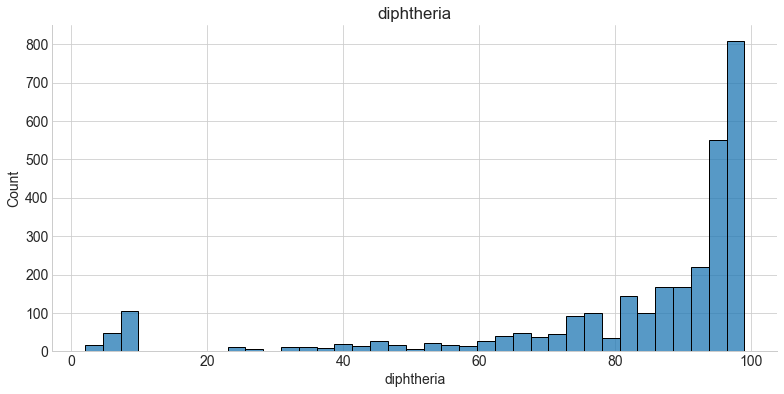

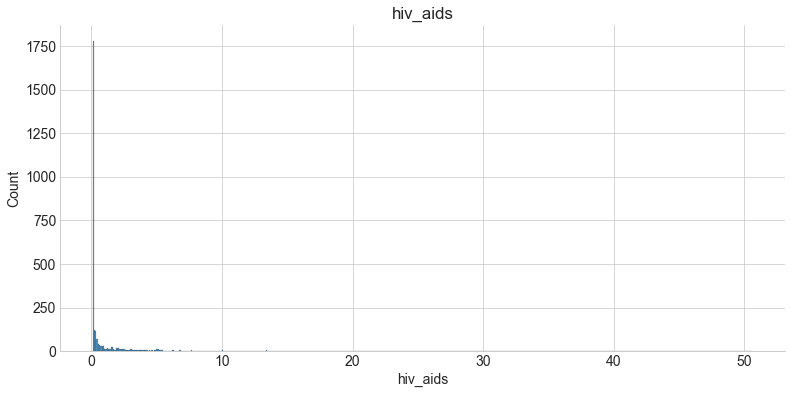

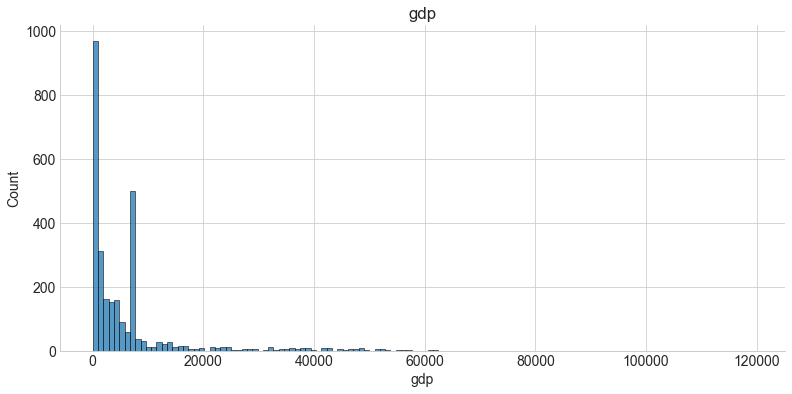

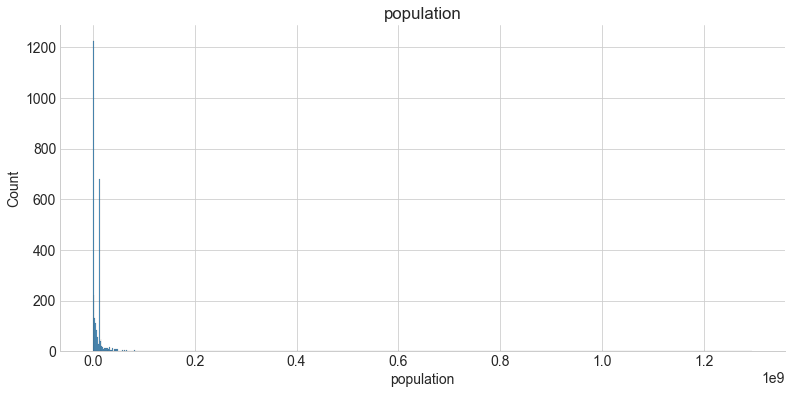

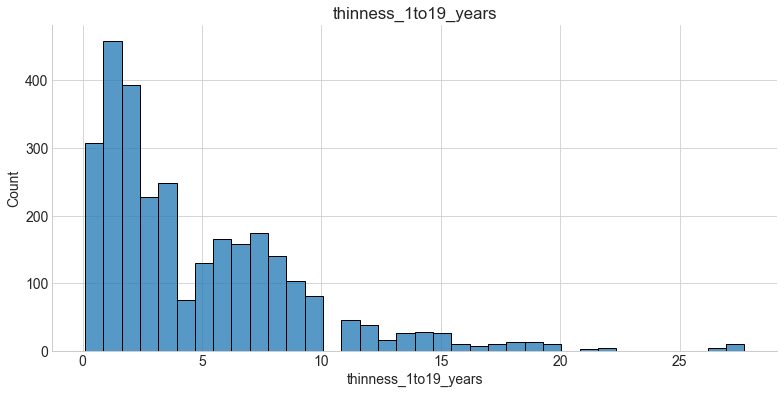

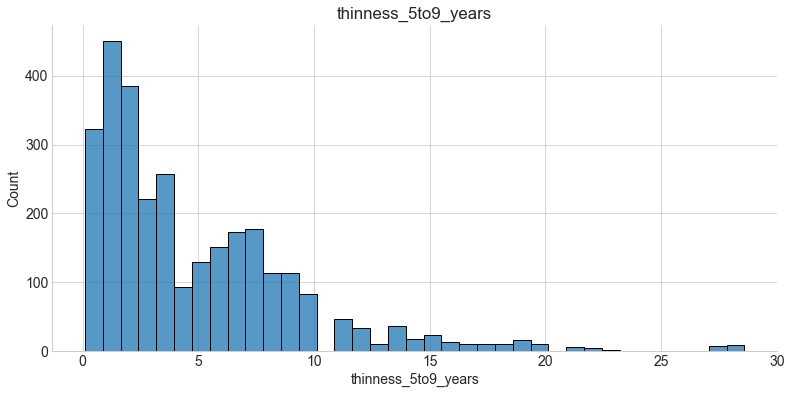

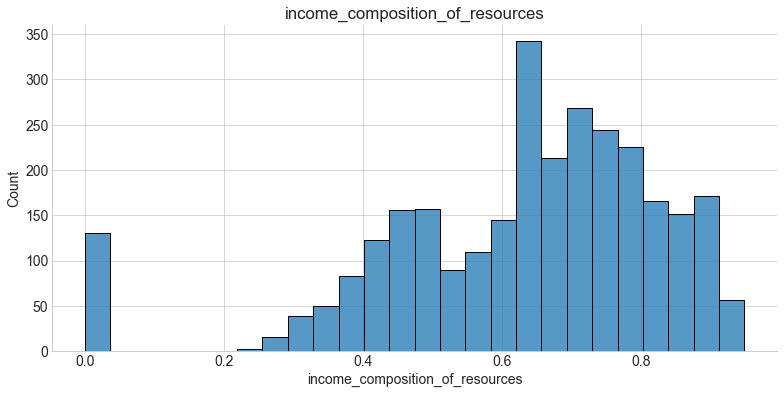

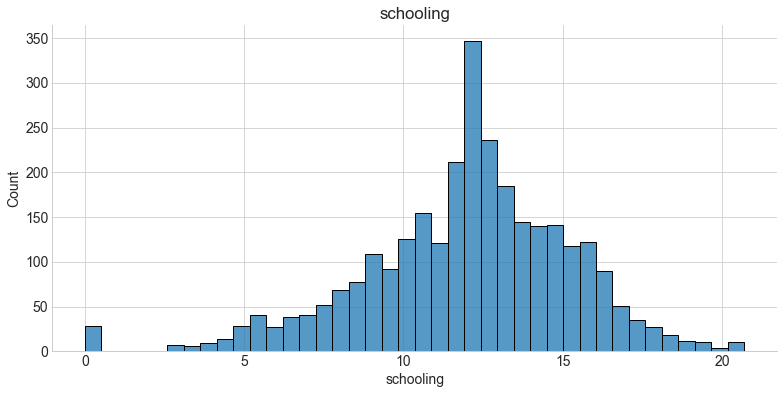

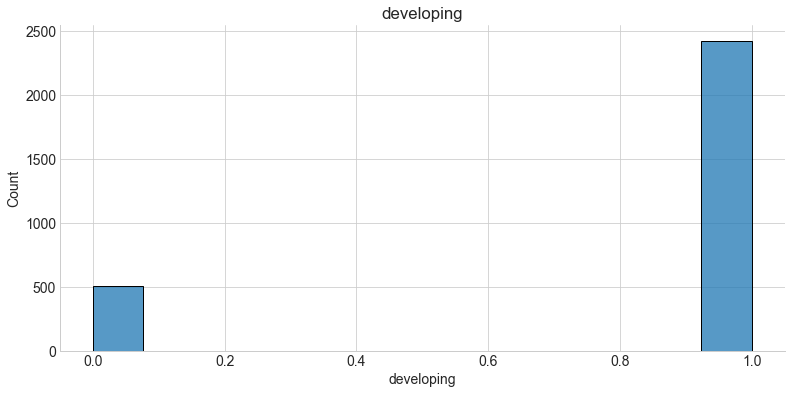

In [20]:
ex.plot_distributions(df)

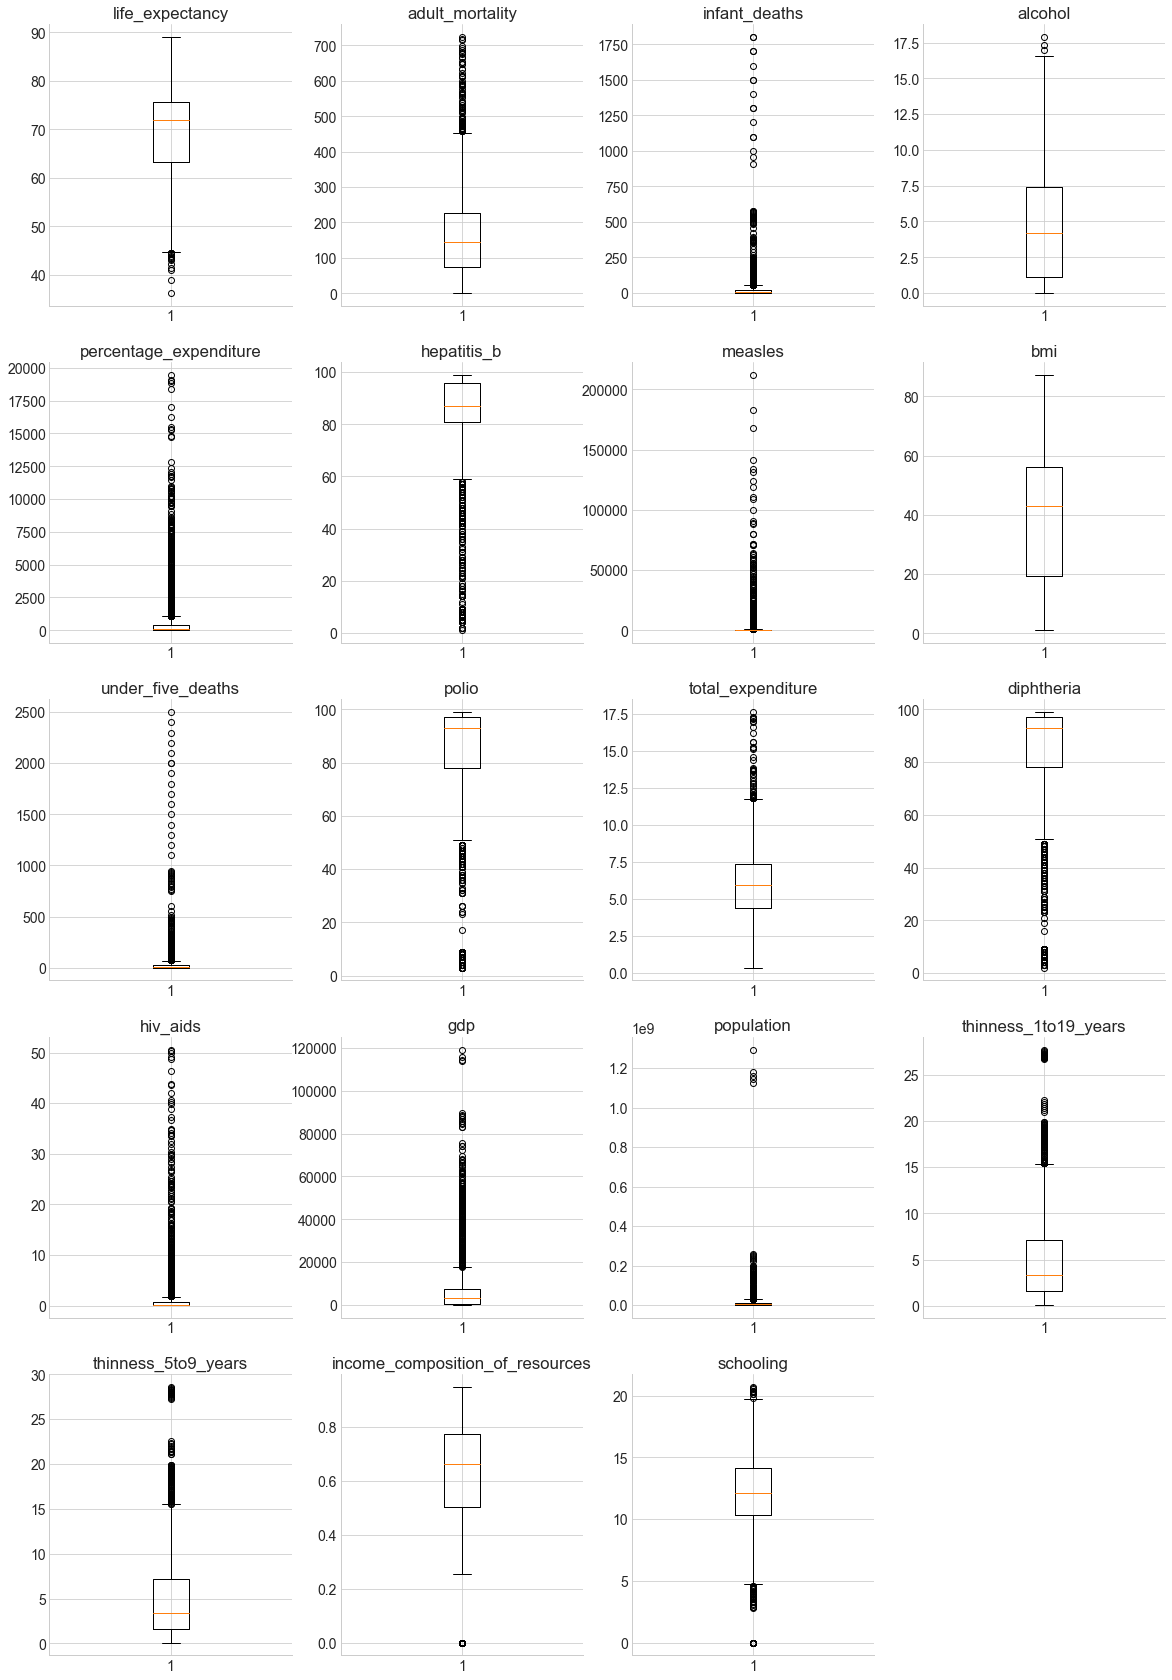

In [21]:
# Exploring outliers with boxplots

# Create a dictionary of columns
col_dict = {'life_expectancy':1,'adult_mortality':2,'infant_deaths':3,'alcohol':4,'percentage_expenditure':5,
            'hepatitis_b':6,'measles':7,'bmi':8,'under_five_deaths':9,'polio':10,'total_expenditure':11,'diphtheria':12,
            'hiv_aids':13,'gdp':14,'population':15,'thinness_1to19_years':16,'thinness_5to9_years':17,
            'income_composition_of_resources':18,'schooling':19}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.title(variable)

plt.show()

**Takeaways: Some of the variables have relatively normal distributions such as life expectancy and total expenditure but many are significantly skewed to one side and have outliers. This makes sense since undeveloped countries will often have drastically different values for certrain variables. I'll move on with splitting and multivariate exploration for now and remove outliers at a later time if they become an issue for analysis.**

## Split Data

In [22]:
train, validate, test = wr.split_data(df)
train.shape, validate.shape, test.shape

((1645, 22), (705, 22), (588, 22))

## Multivariate Exploration

In [23]:
#Create a list with all my continuous variables -- everything minus country, development status, and year
quant_vars = list(df.drop(columns = ['country', 'developing', 'year']).columns)
cat_vars = ['developing']
target = 'life_expectancy'

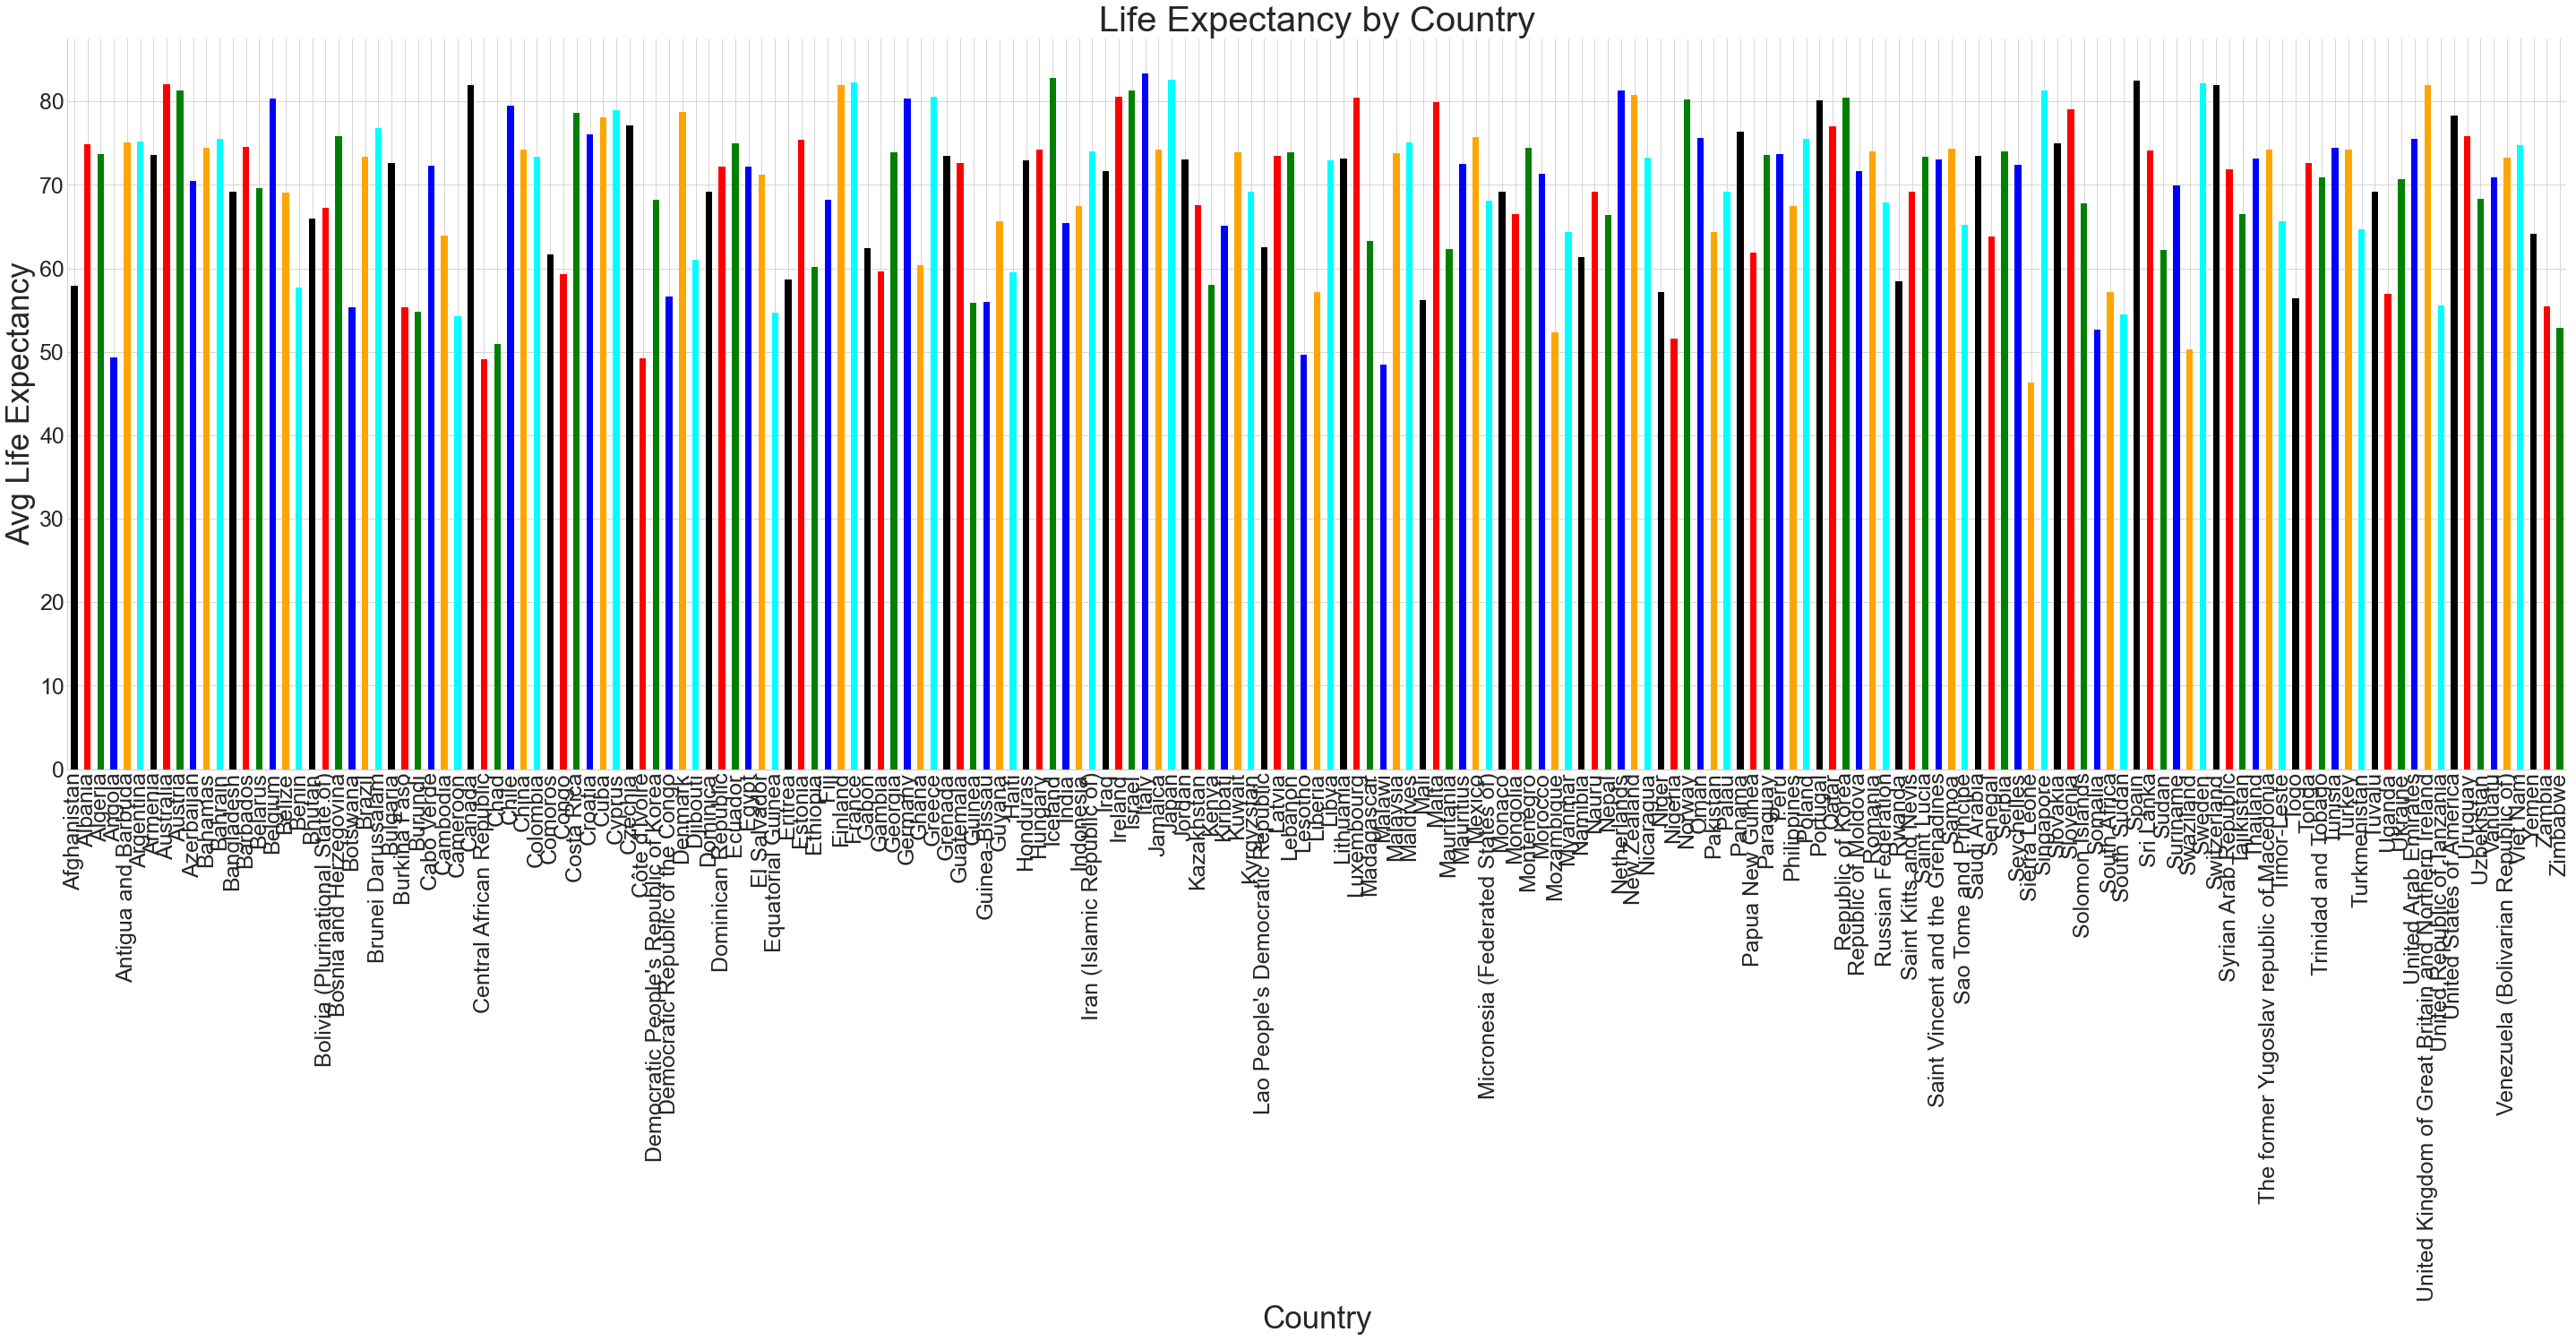

In [24]:
# I want to start by looking at life expectancy by country 
le_country = train.groupby('country')['life_expectancy'].mean()
le_country.plot(kind='bar', figsize=(50,15), fontsize=25, color=['black', 'red', 'green', 'blue', 'orange', 'cyan'])
plt.title("Life Expectancy by Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Life Expectancy",fontsize=35)
plt.show()

*Clear divisions between different countries life expectancies.*

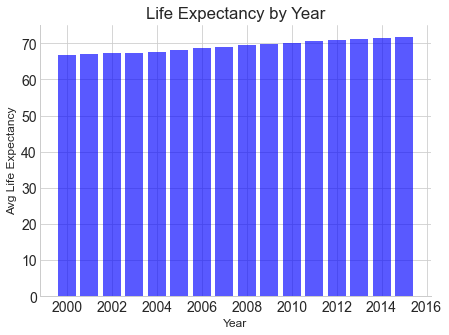

In [25]:
# Life_Expectancy by Year using bar plot.
plt.figure(figsize=(7,5))
plt.bar(train.groupby('year')['year'].count().index,df.groupby('year')['life_expectancy'].mean(),color='blue',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life Expectancy",fontsize=12)
plt.title("Life Expectancy by Year")
plt.show()

*A steady increase in life expectancy through the years.*

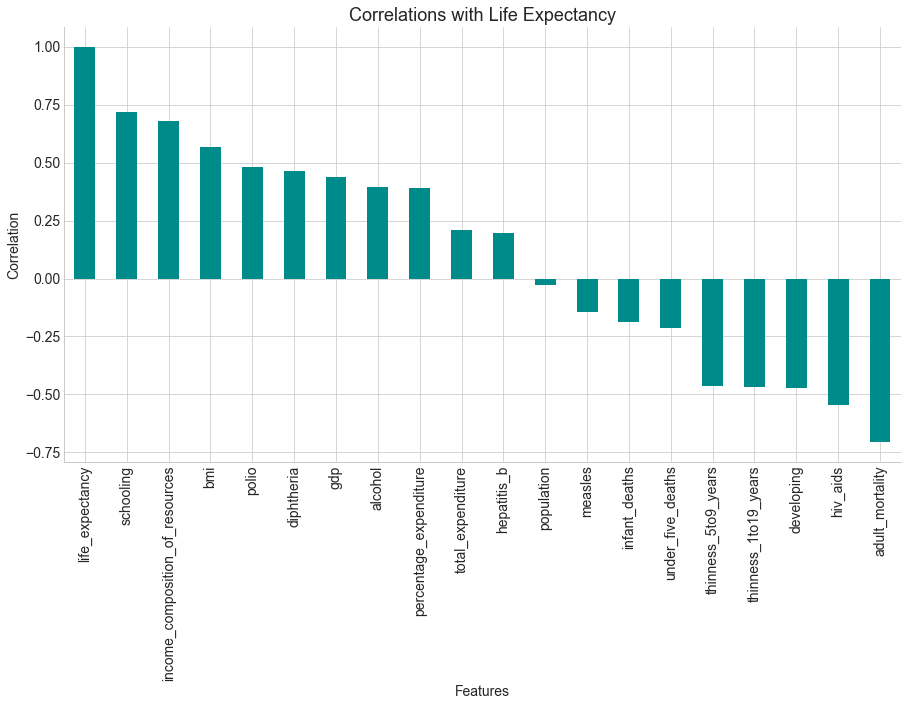

In [26]:
# Checking assessed_value correlation vs all variables

ex.plot_correlations(train)

*I immediately detect some strong correlations with my target variable, life expectancy. Schooling and income composition have the strongest positive correlation while adult_mortality and hiv_aids have very strong negative correlations. These are strong candidates for statistical testing and further exploration.* 

<AxesSubplot:>

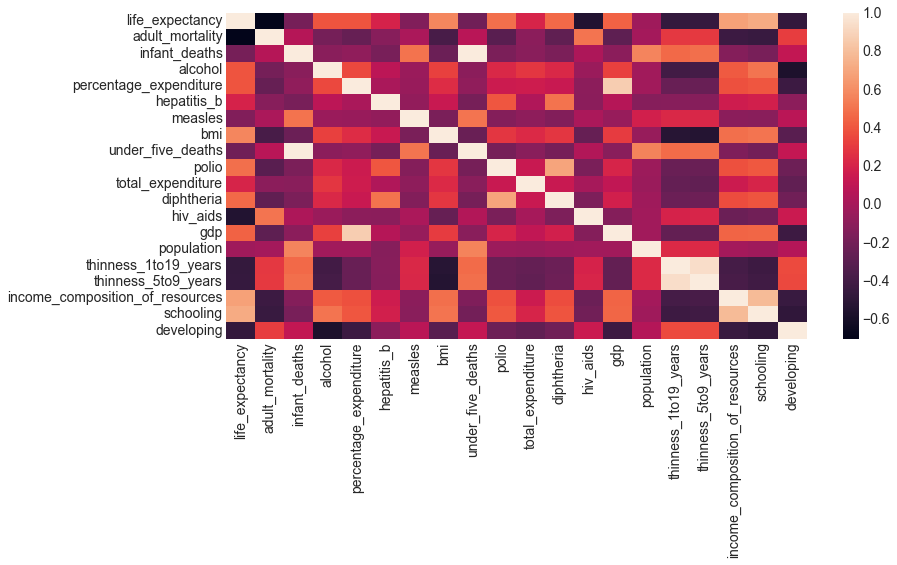

In [27]:
# Simple heatmap
sns.heatmap(train.corr())

In [28]:
# Let's create a correlation matrix and improve our heatmap
# Create the correlation matrix for all exams.

le_corr = train.drop(columns=['year', 'country']).corr()
le_corr

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1to19_years,thinness_5to9_years,income_composition_of_resources,schooling,developing
life_expectancy,1.000000,-0.705191,-0.187249,0.392868,0.388358,0.194478,-0.145999,0.567321,-0.214794,0.481242,0.207278,0.465593,-0.547451,0.439847,-0.026079,-0.465915,-0.462362,0.679549,0.717028,-0.472826
adult_mortality,-0.705191,1.000000,0.055150,-0.193300,-0.253057,-0.124287,0.016268,-0.381243,0.071305,-0.306814,-0.109796,-0.282756,0.500904,-0.287622,-0.010955,0.290419,0.298958,-0.438535,-0.449141,0.308889
infant_deaths,-0.187249,0.055150,1.000000,-0.112395,-0.088835,-0.181180,0.495950,-0.233365,0.996640,-0.168333,-0.116689,-0.167469,0.027486,-0.111332,0.560383,0.466915,0.483953,-0.134885,-0.182828,0.111588
alcohol,0.392868,-0.193300,-0.112395,1.000000,0.351202,0.082082,-0.051829,0.321226,-0.110887,0.220758,0.283439,0.224425,-0.051568,0.321648,-0.020892,-0.407955,-0.395410,0.408545,0.500749,-0.573814
percentage_expenditure,0.388358,-0.253057,-0.088835,0.351202,1.000000,0.008788,-0.055447,0.241596,-0.091677,0.154006,0.157490,0.139962,-0.101865,0.866161,-0.023925,-0.249239,-0.250914,0.378781,0.396365,-0.432596
hepatitis_b,0.194478,-0.124287,-0.181180,0.082082,0.008788,1.000000,-0.082752,0.136433,-0.185885,0.400305,0.040552,0.494937,-0.106296,0.054176,-0.126335,-0.120828,-0.126588,0.154520,0.175348,-0.104804
measles,-0.145999,0.016268,0.495950,-0.051829,-0.055447,-0.082752,1.000000,-0.172781,0.502304,-0.136831,-0.094761,-0.140390,0.018611,-0.065115,0.175259,0.220678,0.218287,-0.105781,-0.117197,0.074528
bmi,0.567321,-0.381243,-0.233365,0.321226,0.241596,0.136433,-0.172781,1.000000,-0.244697,0.285861,0.232802,0.285082,-0.253808,0.300786,-0.061328,-0.531568,-0.539875,0.486922,0.506093,-0.309431
under_five_deaths,-0.214794,0.071305,0.996640,-0.110887,-0.091677,-0.185885,0.502304,-0.244697,1.000000,-0.187808,-0.118698,-0.188000,0.041609,-0.115665,0.556665,0.472244,0.486794,-0.154710,-0.200176,0.114947
polio,0.481242,-0.306814,-0.168333,0.220758,0.154006,0.400305,-0.136831,0.285861,-0.187808,1.000000,0.137317,0.689651,-0.178430,0.203385,-0.039507,-0.241486,-0.242193,0.374648,0.401261,-0.232195


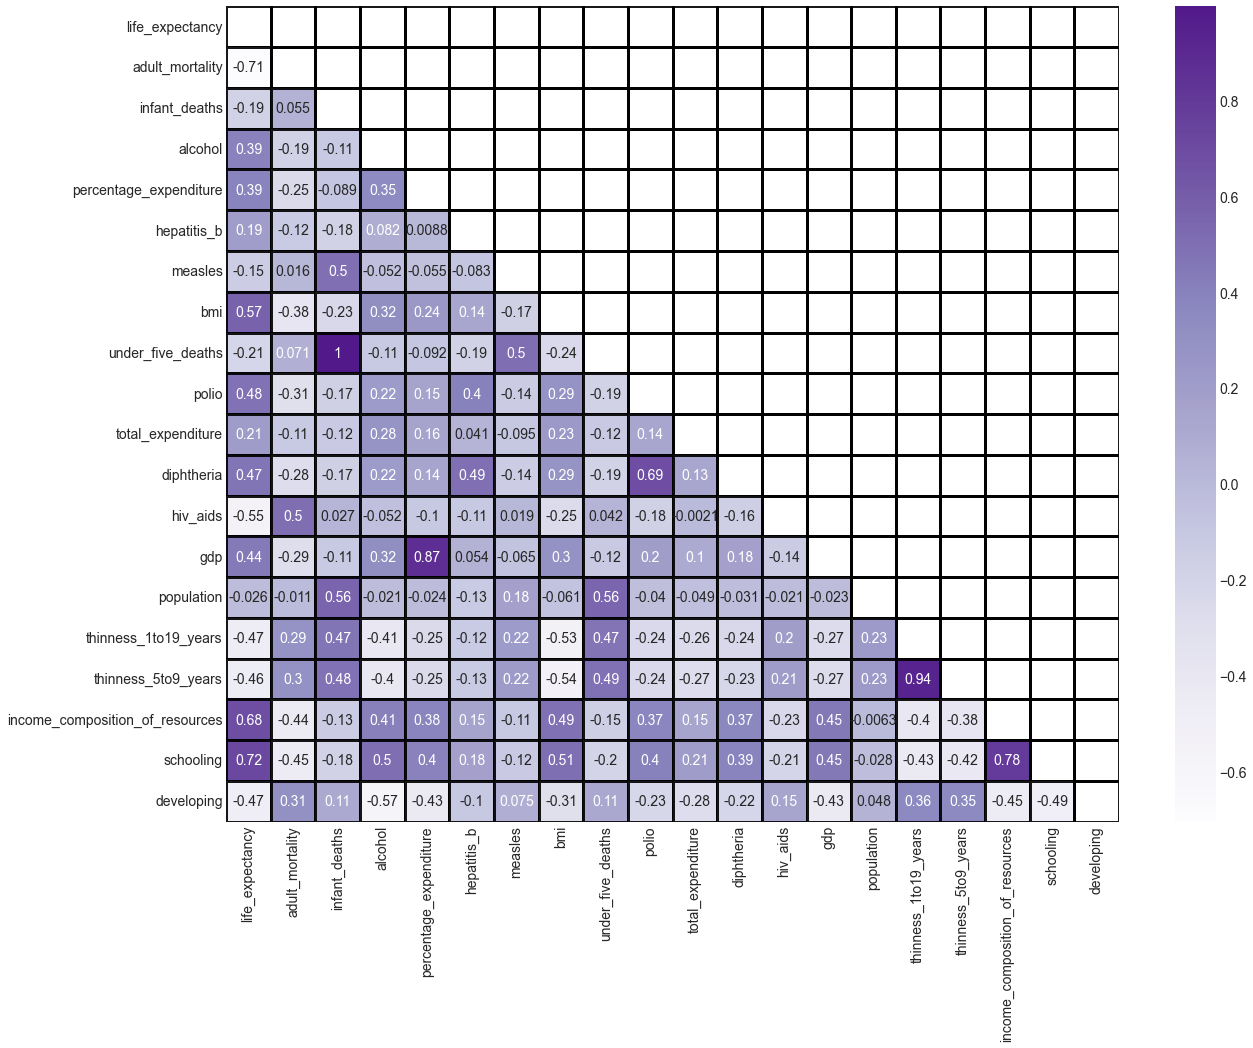

In [29]:
# Pass my correlation matrix to Seaborn's heatmap.

kwargs = {'alpha':.9,'linewidth':3, 'linestyle':'-', 
          'linecolor':'k','rasterized':False, 'edgecolor':'w', 
          'capstyle':'projecting',}

plt.figure(figsize=(20, 15))
sns.heatmap(le_corr, cmap='Purples', annot=True, mask= np.triu(le_corr), **kwargs)
plt.show()

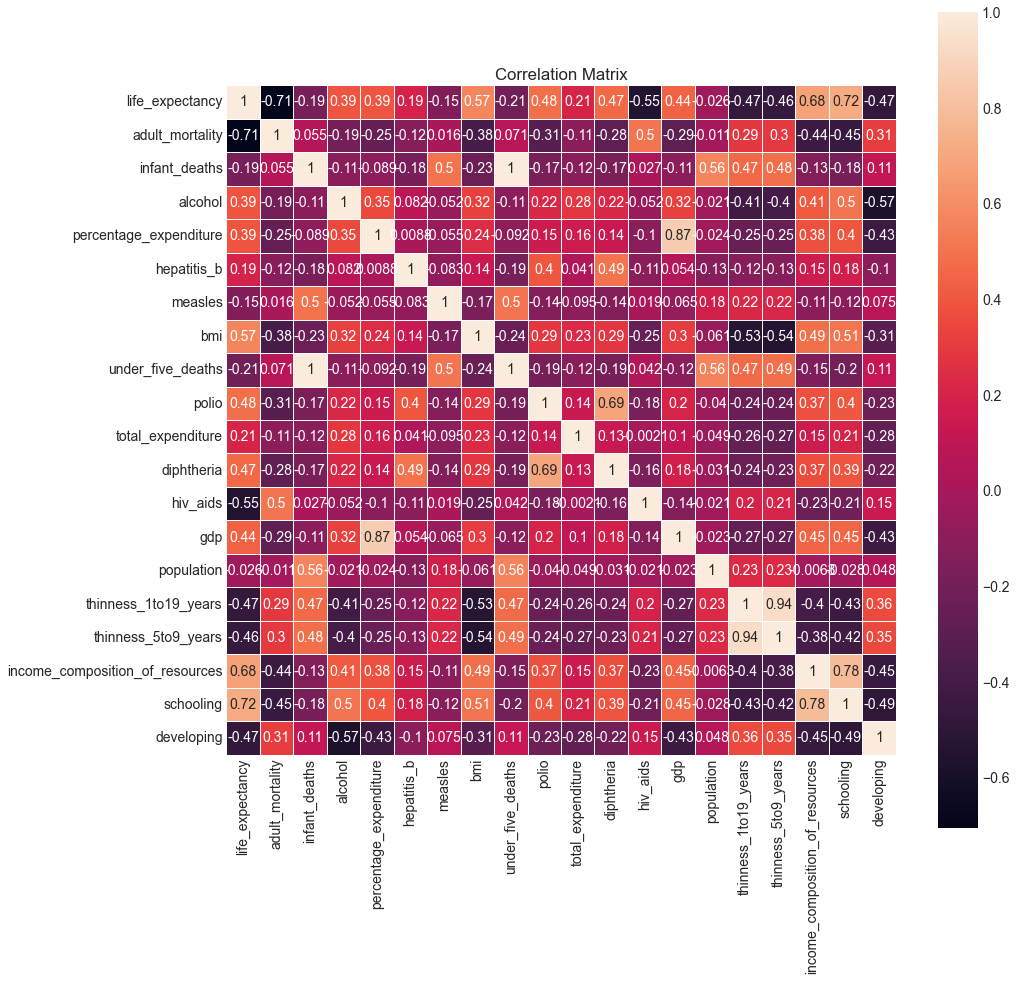

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(le_corr, square=True, annot=True, linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

*Takeaways:*

- Life expectancy negatively correlated with adult mortality, which makes perfect sense since. 
- Life expectancy highly correlated with income composition and schooling.
- Infant deaths and under five deaths are perfectly correlated. They seem like they are duplicate features measuring the same thing.
- Percentage expenditure and gdp are highly correlated.
- Measles and under five deaths are moderately correlated
- BMI and the thinness variables are negatively correlated.
- Polio and diphtheria are highly correlated.
- Schooling and diphtheria have a moderate correlation.
- Population and infant deaths/under five deaths are highly correlated.
- Thinness variables are highly correlated to eachother. If you're thin as an infant you're likely thin as an adolescent.
- Schooling and income composition are highly correlated.
- Alcohol is negatively correlated with developing countries. 

### Initial Questions to Answer

1. Is there a linear relationship between income composition of resources and life expectancy?
2. Is there a linear relationship between schooling and life expectancy? Is this a real correlation or is it because schooling is correlated with income composition? Which is the more important causal variable for life expectancy?
3. Is there a significant relationship between being a developing country and infant mortality?
4. Is there a signifiant relationship between gdp and life expectancy?

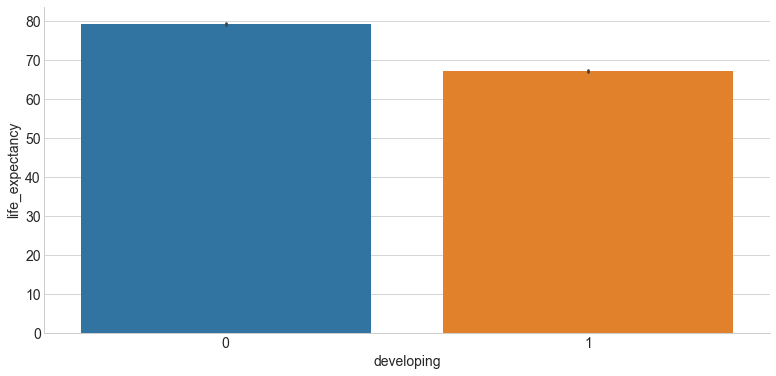

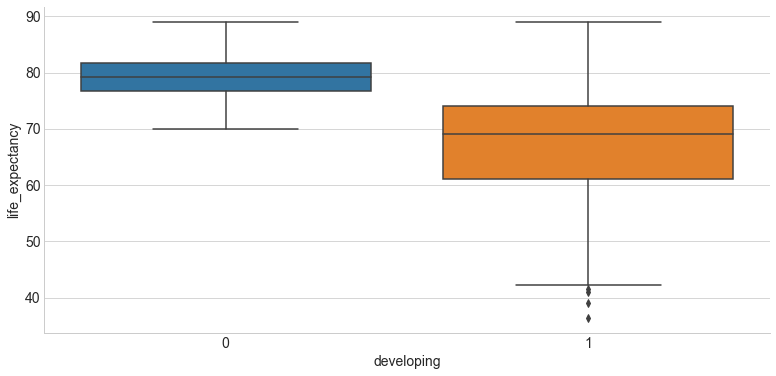

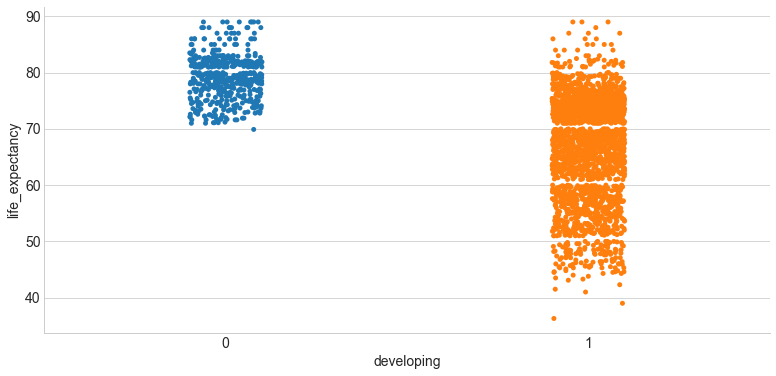

In [33]:
ex.plot_categorical_and_continuous_vars(df, 'developing', 'life_expectancy')